# 首先，我们从递进编码之后的数据开始

In [1]:
import sys 
sys.path.append('./xgboost/python-package/')
sys.path.append('./fancyimpute/fancyimpute/')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from mlxtend.regressor import StackingRegressor
pd.set_option("display.max_columns",1000000)
pd.set_option('display.max_rows', 1000000)

In [2]:
from fancyimpute import KNN 

Using TensorFlow backend.


In [3]:
train = pd.read_csv('./remastered.csv')
test = pd.read_csv('./test_prepro.csv')

In [4]:
train_target = train['SalePrice']

In [5]:
train = train.drop(['index','Id'],axis = 1)
test = test.drop(['index','Id'],axis = 1)

In [6]:
test[['GarageYrBlt','YrSold']]

,GarageYrBlt,YrSold
0,1961,2010
1,1958,2010
2,1997,2010
3,1998,2010
4,1992,2010
5,1993,2010
6,1992,2010
7,1998,2010
8,1990,2010
9,1970,2010


In [7]:
test['YrSold'] == 2009

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

# 把year labelencoder

In [8]:
train['MSSubClass'] = train['MSSubClass'].astype(object)
test['MSSubClass'] = test['MSSubClass'].astype(object)

In [9]:
lis = ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']
train[lis] = train[lis].astype(int)
test[lis] = test[lis].astype(int)

In [10]:
# label = LabelEncoder()

In [11]:
# train["YearBuilt"] = label.fit_transform(train["YearBuilt"])
# train["YearRemodAdd"] = label.fit_transform(train["YearRemodAdd"])
# train["GarageYrBlt"] = label.fit_transform(train["GarageYrBlt"])
# train["YrSold"] = label.fit_transform(train["YrSold"])

# test["YearBuilt"] = label.fit_transform(test["YearBuilt"])
# test["YearRemodAdd"] = label.fit_transform(test["YearRemodAdd"])
# test["GarageYrBlt"] = label.fit_transform(test["GarageYrBlt"])
# test["YrSold"] = label.fit_transform(test["YrSold"])

In [12]:
train_without4_without_price = train.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical','SalePrice'],axis=1)
test_without4 = test.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical'],axis=1)

In [13]:
train_without4_without_price.shape

(1460, 75)

In [14]:
test_without4.shape

(1459, 75)

# 特征工程

In [15]:
def transform(X):
    X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
    X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
    X['Yrsold_minus_Remod'] = X['YrSold']-X['YearRemodAdd']
    #X[X['Yrsold_minus_Remod'] < 0] = 0.9
    X.loc[X['Yrsold_minus_Remod']<0,'Yrsold_minus_Remod']=0.9
    X['Yrsold_minus_garage'] = X['YrSold']-X['GarageYrBlt']
    X.loc[X['Yrsold_minus_garage']<0,'Yrsold_minus_garage']=0.9
    X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
    X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]

    
    X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]

    X["-_Functional_TotalHouse"] = X["Functional"] * X["TotalHouse"]
    X["-_Functional_OverallQual"] = X["Functional"] + X["OverallQual"]
    X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
    X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]



    X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
    X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
    X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
    X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]


    return X

In [16]:
# train_without4_without_price = transform(train_without4_without_price)
# test_without4 = transform(test_without4)

In [17]:
train_without4_without_price.shape

(1460, 75)

In [18]:
test_without4.shape

(1459, 75)

# 做skew 和 one hot

In [19]:
X_numeric=train_without4_without_price.select_dtypes(exclude=["object"])
skewness = X_numeric.apply(lambda x: skew(x))
skewness_features = skewness[abs(skewness) >= 0.75].index
train_without4_without_price[skewness_features] = np.log1p(train_without4_without_price[skewness_features])
train_without4_without_price = pd.get_dummies(train_without4_without_price)

In [20]:
X_numeric=test_without4.select_dtypes(exclude=["object"])
# skewness = X_numeric.apply(lambda x: skew(x))
# skewness_features = skewness[abs(skewness) >= 0.75].index
test_without4[skewness_features] = np.log1p(test_without4[skewness_features])
test_without4 = pd.get_dummies(test_without4)

# concat 之后，所有train 和test  feature 自动排序和填补空缺值0，然后再切分

In [21]:
full = pd.concat([train_without4_without_price,test_without4])

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [22]:
full.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,EnclosedPorch,ExterCond,ExterQual,Exterior1st_0,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_0,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotShape,LowQualFinSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscVal,MoSold,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_0,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,0.0,3,1,0,0,0,0,1.386294,0.693147,6.561031,0.0,6,0.693147,1,0.000000,1.609438,5.017280,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.000000,1.386294,1.609438,NaN,0,0,0,0,0,0,0,0.0,0,0,0.0,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,0.0,0,0,4,2,2.197225,548,2,1.386294,2,1.386294,5,7.602900,7.444833,1,1.791759,5,1.609438,0.693147,4,1.609438,1.386294,9.042040,1.791759,1.609438,0.0,0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,0,0,0,1,0,0,0,0,0.0,0.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.127134,5,7,1.386294,0.0,0.0,1.098612,0,1,0,0,0,0,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,1,0.0,1.098612,8,6.753438,1.609438,0.000000,2003,2003,2008
1,7.141245,0.000000,0.0,0.0,3,1,0,0,0,0,1.386294,1.609438,6.886532,0.0,5,0.693147,0,0.693147,1.609438,5.652489,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.000000,1.386294,1.386294,NaN,0,0,0,0,0,0,0,0.0,1,0,0.0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,3,1,5,2,2.197225,460,2,1.386294,2,1.386294,5,7.589336,7.141245,0,1.791759,5,0.693147,0.693147,3,1.609438,1.386294,9.169623,1.098612,1.609438,0.0,0,NaN,0,0,

In [23]:
full = full.fillna(0)

In [24]:
train_without4_without_price_want_to_impute = full.iloc[:1460,:]
test_without4_want_to_impute = full.iloc[1460:,:]

In [25]:
train_without4_without_price_want_to_impute.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
Alley                    0
BedroomAbvGr             0
BldgType_1Fam            0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
BsmtCond                 0
BsmtExposure             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFinType1             0
BsmtFinType2             0
BsmtFullBath             0
BsmtHalfBath             0
BsmtQual                 0
BsmtUnfSF                0
CentralAir_N             0
CentralAir_Y             0
Condition1_Artery        0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
Condition1_RRNn          0
Condition2_Artery        0
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
Condition2_RRAe          0
C

In [26]:
test_without4_want_to_impute.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
Alley                    0
BedroomAbvGr             0
BldgType_1Fam            0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
BsmtCond                 0
BsmtExposure             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFinType1             0
BsmtFinType2             0
BsmtFullBath             0
BsmtHalfBath             0
BsmtQual                 0
BsmtUnfSF                0
CentralAir_N             0
CentralAir_Y             0
Condition1_Artery        0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
Condition1_RRNn          0
Condition2_Artery        0
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
Condition2_RRAe          0
C

In [27]:
train_only4 = train[['LotFrontage','MasVnrArea','MasVnrType','Electrical']]
test_only4 = test[['LotFrontage','MasVnrArea','MasVnrType','Electrical']]

In [28]:
train_only4.head(5)


,LotFrontage,MasVnrArea,MasVnrType,Electrical
0,65.0,196.0,3.0,5.0
1,80.0,0.0,1.0,5.0
2,68.0,162.0,3.0,5.0
3,60.0,0.0,1.0,5.0
4,84.0,350.0,3.0,5.0


In [29]:
test_only4.head(5)

,LotFrontage,MasVnrArea,MasVnrType,Electrical
0,80.0,0.0,1.0,5
1,81.0,108.0,3.0,5
2,74.0,0.0,1.0,5
3,78.0,20.0,3.0,5
4,43.0,0.0,1.0,5


In [30]:
train_with4 = pd.concat([train_without4_without_price_want_to_impute,train_only4],axis=1)
test_with4 = pd.concat([test_without4_want_to_impute,test_only4],axis=1)


In [31]:
all_column_name = list(train_with4.columns)


# 自动补全

In [32]:
X_filled_knn_train = KNN().fit_transform(train_with4)
X_filled_knn_test = KNN().fit_transform(test_with4)

Imputing row 1/1460 with 0 missing, elapsed time: 1.868
Imputing row 101/1460 with 1 missing, elapsed time: 1.870
Imputing row 201/1460 with 0 missing, elapsed time: 1.872
Imputing row 301/1460 with 0 missing, elapsed time: 1.873
Imputing row 401/1460 with 0 missing, elapsed time: 1.875
Imputing row 501/1460 with 0 missing, elapsed time: 1.876
Imputing row 601/1460 with 0 missing, elapsed time: 1.878
Imputing row 701/1460 with 0 missing, elapsed time: 1.880
Imputing row 801/1460 with 0 missing, elapsed time: 1.881
Imputing row 901/1460 with 1 missing, elapsed time: 1.883
Imputing row 1001/1460 with 0 missing, elapsed time: 1.885
Imputing row 1101/1460 with 0 missing, elapsed time: 1.886
Imputing row 1201/1460 with 0 missing, elapsed time: 1.888
Imputing row 1301/1460 with 1 missing, elapsed time: 1.889
Imputing row 1401/1460 with 0 missing, elapsed time: 1.891
Imputing row 1/1459 with 0 missing, elapsed time: 1.761
Imputing row 101/1459 with 0 missing, elapsed time: 1.763
Imputing row 

In [33]:
fullfill_train = pd.DataFrame(X_filled_knn_train,columns=all_column_name)
fullfill_test = pd.DataFrame(X_filled_knn_test,columns=all_column_name)

In [34]:
fullfill_train.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
Alley                    0
BedroomAbvGr             0
BldgType_1Fam            0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
BsmtCond                 0
BsmtExposure             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFinType1             0
BsmtFinType2             0
BsmtFullBath             0
BsmtHalfBath             0
BsmtQual                 0
BsmtUnfSF                0
CentralAir_N             0
CentralAir_Y             0
Condition1_Artery        0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
Condition1_RRNn          0
Condition2_Artery        0
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
Condition2_RRAe          0
C

In [35]:
fullfill_test.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
Alley                    0
BedroomAbvGr             0
BldgType_1Fam            0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
BsmtCond                 0
BsmtExposure             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFinType1             0
BsmtFinType2             0
BsmtFullBath             0
BsmtHalfBath             0
BsmtQual                 0
BsmtUnfSF                0
CentralAir_N             0
CentralAir_Y             0
Condition1_Artery        0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
Condition1_RRNn          0
Condition2_Artery        0
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
Condition2_RRAe          0
C

In [36]:
fullfill_train['SalePrice'] = train_target

In [37]:
fullfill_train_X = fullfill_train.drop(['SalePrice'],axis = 1)

In [38]:
fullfill_train_X.shape

(1460, 196)

In [39]:
fullfill_train.shape

(1460, 197)

In [40]:
fullfill_test.shape

(1459, 196)

# 删数据，加feature

In [41]:
train_without4_without_price = train.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical','SalePrice'],axis=1)
test_without4 = test.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical'],axis=1)

In [42]:
train_with4 = pd.concat([train_without4_without_price,fullfill_train[['LotFrontage','MasVnrArea','MasVnrType','Electrical']]],axis = 1)

In [43]:
test_with4 = pd.concat([test_without4,fullfill_test[['LotFrontage','MasVnrArea','MasVnrType','Electrical']]],axis = 1)

In [44]:
train_with4 = transform(train_with4)

In [45]:
test_with4 = transform(test_with4)

In [46]:
test_with4.describe()

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,MasVnrType,Electrical,TotalHouse,TotalArea,Yrsold_minus_Remod,Yrsold_minus_garage,+_TotalHouse_OverallQual,+_GrLivArea_OverallQual,+_BsmtFinSF1_OverallQual,-_Functional_TotalHouse,-_Functional_OverallQual,-_LotArea_OverallQual,-_TotalHouse_LotArea,Bsmt,Rooms,PorchArea,TotalPlace
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,9819.161069,2.004112,0.194654,3.607951,3.834133,3.994517,4.612063,2.954764,2.530500,6.078821,5.553804,1971.357779,1983.662783,2.050720,3.397533,3.087731,4.610007,3.466073,2.901988,1.617546,3.537354,438.902673,1.300206,52.583276,553.915010,1045.400960,4.985607,4.158328,1156.534613,325.967786,3.543523,1486.045922,0.433859,0.065113,1.570939,0.377656,2.854010,1.042495,3.507882,6.385195,7.843729,0.58122,1.710761,3.518163,1871.989719,1.716244,1.764907,472.444825,2.791638,2.808773,2.805346,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,0.009596,0.595613,58.167923,6.104181,2007.769705,69.014651,100.896833,1.962581,4.874572,2527.903358,3000.348184,24.110212,135.918986,16117.860178,9422.856066,2879.281014,19854.796436,13.922550,60457.296093,12347.064428,1045.400960,7.956134,91.416038,3091.764222
std,4955.517327,0.064018,0.704054,0.557864,0.517101,0.148047,0.767314,0.217566,1.972617,1.436812,1.113740,30.390071,21.130467,0.471584,0.586444,0.392637,0.731936,0.933697,0.596621,1.072985,2.120627,455.257119,1.013797,176.698671,437.351324,443.592976,0.182758,0.956684,398.165820,420.610226,44.043251,485.566099,0.530527,0.252307,0.555190,0.503017,0.829788,0.208472,0.667006,1.508895,0.676050,0.64742,1.801147,1.933083,445.786118,0.902110,0.777056,217.326902,0.708879,0.705479,0.574204,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,0.212545,1.230447,630.806978,2.722432,1.301740,21.424507,177.036488,1.296787,0.495554,787.961712,931.976236,21.128071,445.727529,8335.425380,4816.851752,3531.834458,6426.481023,1.717786,35894.917640,5309.777737,443.592976,1.850220,110.544160,963.377657
min,1470.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1879.000000,1950.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [47]:
train_with4.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis = 1,inplace=True)

In [48]:
test_with4.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis = 1,inplace=True)

In [49]:
full2 = pd.concat([train_with4,test_with4])

In [50]:
full2 = full2.fillna(0)

In [51]:
train_with4 = full2.iloc[:1460,:]
test_with4 = full2.iloc[1460:,:]

In [52]:
train_with4.shape

(1460, 89)

In [53]:
test_with4.shape

(1459, 89)

In [54]:
X_numeric=train_with4.select_dtypes(exclude=["object"])
skewness = X_numeric.apply(lambda x: skew(x))
skewness_features = skewness[abs(skewness) >= 0.75].index
train_with4[skewness_features] = np.log1p(train_with4[skewness_features])
train_with4 = pd.get_dummies(train_with4)

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [55]:
X_numeric=test_with4.select_dtypes(exclude=["object"])
# skewness = X_numeric.apply(lambda x: skew(x))
# skewness_features = skewness[abs(skewness) >= 0.75].index
test_with4[skewness_features] = np.log1p(test_with4[skewness_features])
test_with4 = pd.get_dummies(test_with4)

In [56]:
train_with4.shape

(1460, 188)

In [57]:
test_with4.shape

(1459, 185)

In [58]:
set(train_with4)-set(test_with4)

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'MiscFeature_TenC'}

In [59]:
full3 = pd.concat([train_with4,test_with4])
full3 = full3.fillna(0)
train_with4 = full3.iloc[:1460,:]
test_with4 = full3.iloc[1460:,:]

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [60]:
train_with4.isnull().sum()

+_BsmtFinSF1_OverallQual    0
+_GrLivArea_OverallQual     0
+_TotalHouse_OverallQual    0
-_Functional_OverallQual    0
-_Functional_TotalHouse     0
-_LotArea_OverallQual       0
-_TotalHouse_LotArea        0
1stFlrSF                    0
2ndFlrSF                    0
3SsnPorch                   0
Alley                       0
BedroomAbvGr                0
BldgType_1Fam               0
BldgType_2fmCon             0
BldgType_Duplex             0
BldgType_Twnhs              0
BldgType_TwnhsE             0
Bsmt                        0
BsmtCond                    0
BsmtExposure                0
BsmtFinSF1                  0
BsmtFinSF2                  0
BsmtFinType1                0
BsmtFinType2                0
BsmtFullBath                0
BsmtHalfBath                0
BsmtQual                    0
BsmtUnfSF                   0
CentralAir_N                0
CentralAir_Y                0
Condition1_Artery           0
Condition1_Feedr            0
Condition1_Norm             0
Condition1

In [61]:
test_with4.shape

(1459, 192)

In [62]:
test_with4.head(5)

,+_BsmtFinSF1_OverallQual,+_GrLivArea_OverallQual,+_TotalHouse_OverallQual,-_Functional_OverallQual,-_Functional_TotalHouse,-_LotArea_OverallQual,-_TotalHouse_LotArea,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Bsmt,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st_0,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_0,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning_0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrArea,MasVnrType,MiscFeature_0,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscVal,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,PorchArea,RoofMatl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Rooms,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_0,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ScreenPorch,Street,TotRmsAbvGrd,TotalArea,TotalBsmtSF,TotalHouse,TotalPlace,Utilities,WoodDeckSF,Yrsold_minus_Remod,Yrsold_minus_garage
0,7.758333,8.407602,9.092795,13,9.562756,10.970110,9.503085,6.799056,0.000000,0.0,0.0,2,1,0,0,0,0,6.783325,1.386294,0.693147,6.150603,4.976734,3,1.098612,0,0.0,1.386294,5.602119,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.791759,0.0,1.386294,1.386294,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,1.386294,0,0,5,1,2.197225,730,1,1.386294,1,1.386294,5,6.799056,0,1.791759,3,0.693147,0.693147,3,1.609438,1.386294,9.360741,1.791759,4.394449,1.609438,0.0,3.044522,0.0,0,0,1,0,0,0.000000,0.693147,1,0,0,0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,6,5,1.386294,0.0,0.0,4.795791,1.098612,0,1,0,0,0,0,6,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,1,4.795791,1.098612,5,7.827640,6.783325,7.483807,7.874359,1.609438,4.948760,49.0,3.912023
1,8.619569,8.984067,9.677151,14,9.964818,11.357476,9.736606,7.192934,0.000000,0.0,0.0,3,1,0,0,0,0,7.192934,1.386294,0.693147,6.828712,0.000000,5,0.693147,0,0.0,1.386294,6.008813,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.791759,0.0,1.386294,1.38629

In [63]:
train_with4.shape

(1460, 192)

# scalar

In [64]:
scaler = RobustScaler()
X_scaled_train = scaler.fit(train_with4).transform(train_with4)
# X_scaled_test = scaler.fit(test_with4).transform(test_with4)

In [65]:
X_scaled_test = scaler.fit(train_with4).transform(test_with4)

In [66]:
fullfill_train_X.to_csv('fullfill_train_X.csv',index = False)

## log price

In [67]:
log_train_target = np.log(train_target)

# 现在用feature selection 去验证源数据是否选择差不多,结果是 差不多的！！

In [68]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled_train,log_train_target)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=train_with4.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,Feature Importance
OverallQual,1.165521e-01
Neighborhood_StoneBr,8.257625e-02
-_Functional_TotalHouse,8.003379e-02
Neighborhood_NridgHt,7.419927e-02
Neighborhood_NoRidge,6.803005e-02
Neighborhood_Crawfor,6.460647e-02
GrLivArea,5.928434e-02
Condition1_Norm,5.568532e-02
Neighborhood_Somerst,4.778500e-02
Exterior1st_BrkFace,4.574738e-02


In [69]:
FI_lasso.sort_values("Feature Importance",ascending=False).index[:50]

Index(['OverallQual', 'Neighborhood_StoneBr', '-_Functional_TotalHouse',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor',
       'GrLivArea', 'Condition1_Norm', 'Neighborhood_Somerst',
       'Exterior1st_BrkFace', 'GarageCars', 'BsmtFinSF1',
       '-_TotalHouse_LotArea', 'OverallCond', 'HeatingQC', 'KitchenQual',
       'FullBath', 'HalfBath', 'TotalPlace', 'TotalHouse', 'BsmtQual',
       'BsmtFullBath', 'FireplaceQu', 'SaleType_New', 'RoofMatl',
       'Neighborhood_BrkSide', 'BsmtExposure', 'BsmtFinType1', 'BldgType_1Fam',
       'Fireplaces', 'WoodDeckSF', 'Exterior2nd_VinylSd', 'ExterQual',
       'Exterior1st_MetalSd', '1stFlrSF', 'GarageFinish', 'RoofStyle_Hip',
       'ScreenPorch', 'SaleCondition_Normal', 'TotalArea', 'MSZoning_RL',
       'LowQualFinSF', 'Rooms', 'OpenPorchSF', '3SsnPorch', 'PavedDrive',
       'CentralAir_Y', 'MiscFeature_TenC', 'Neighborhood_ClearCr',
       'LandContour'],
      dtype='object')

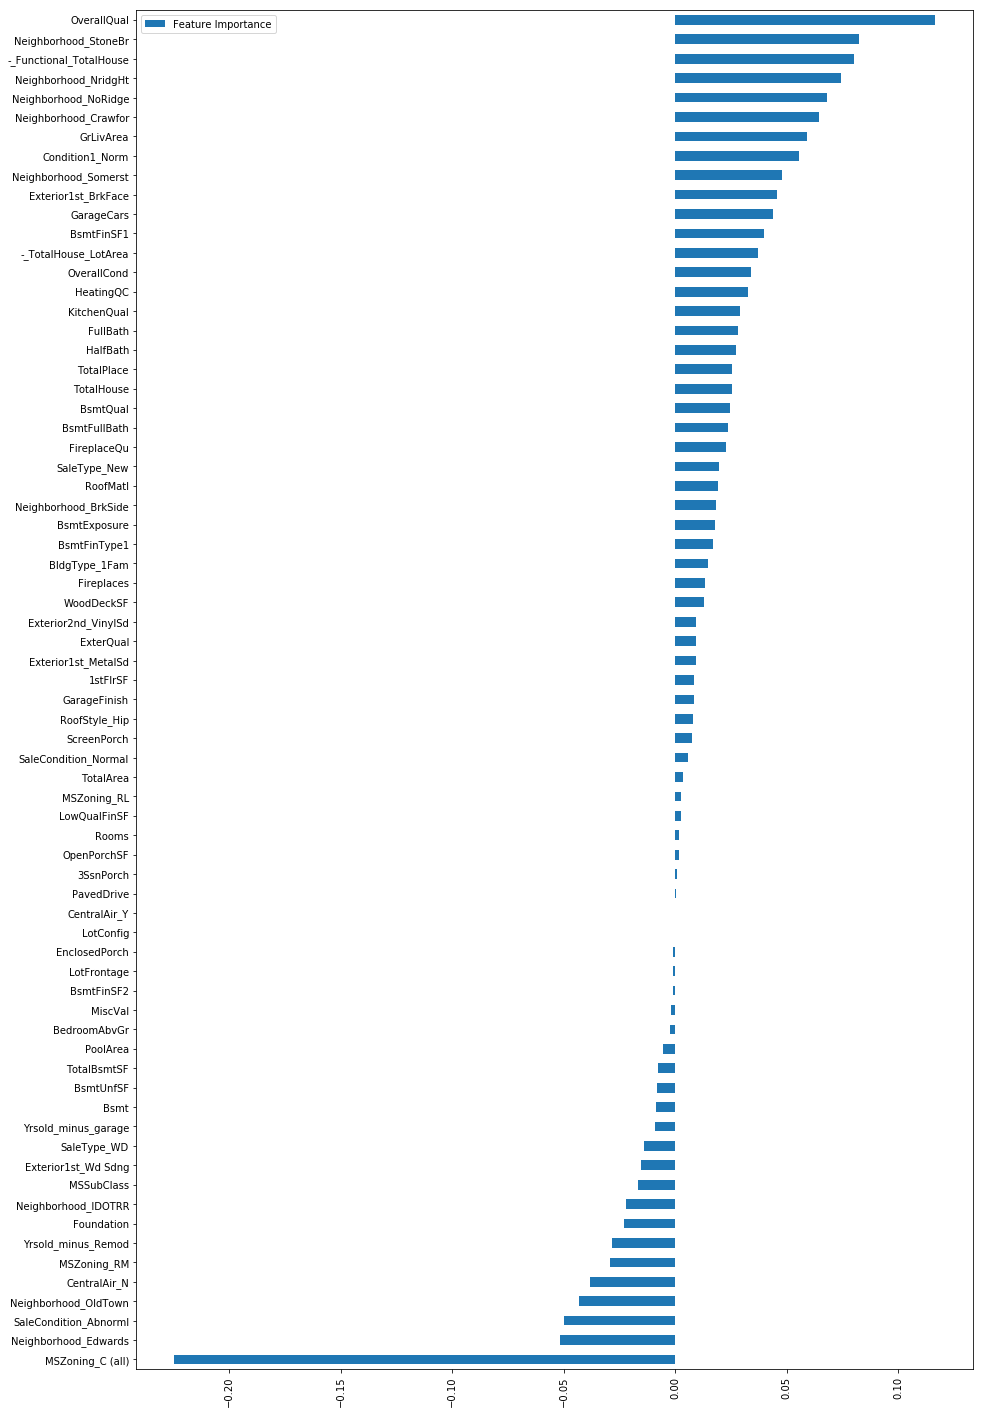

In [70]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [71]:
train_with4 = train_with4[['OverallQual', 'Neighborhood_StoneBr', '-_Functional_TotalHouse',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor',
       'GrLivArea', 'Condition1_Norm', 'Neighborhood_Somerst',
       'Exterior1st_BrkFace', 'GarageCars', 'BsmtFinSF1',
       '-_TotalHouse_LotArea', 'OverallCond', 'HeatingQC', 'KitchenQual',
       'FullBath', 'HalfBath', 'TotalPlace', 'TotalHouse', 'BsmtQual',
       'BsmtFullBath', 'FireplaceQu', 'SaleType_New', 'RoofMatl',
       'Neighborhood_BrkSide', 'BsmtExposure', 'BsmtFinType1', 'BldgType_1Fam',
       'Fireplaces', 'WoodDeckSF', 'Exterior2nd_VinylSd', 'ExterQual',
       'Exterior1st_MetalSd', '1stFlrSF', 'GarageFinish', 'RoofStyle_Hip',
       'ScreenPorch', 'SaleCondition_Normal', 'TotalArea', 'MSZoning_RL',
       'LowQualFinSF', 'Rooms', 'OpenPorchSF', '3SsnPorch', 'PavedDrive',
       'CentralAir_Y', 'MiscFeature_TenC', 'Neighborhood_ClearCr',
       'LandContour']]


In [72]:
test_with4 = test_with4[['OverallQual', 'Neighborhood_StoneBr', '-_Functional_TotalHouse',
       'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor',
       'GrLivArea', 'Condition1_Norm', 'Neighborhood_Somerst',
       'Exterior1st_BrkFace', 'GarageCars', 'BsmtFinSF1',
       '-_TotalHouse_LotArea', 'OverallCond', 'HeatingQC', 'KitchenQual',
       'FullBath', 'HalfBath', 'TotalPlace', 'TotalHouse', 'BsmtQual',
       'BsmtFullBath', 'FireplaceQu', 'SaleType_New', 'RoofMatl',
       'Neighborhood_BrkSide', 'BsmtExposure', 'BsmtFinType1', 'BldgType_1Fam',
       'Fireplaces', 'WoodDeckSF', 'Exterior2nd_VinylSd', 'ExterQual',
       'Exterior1st_MetalSd', '1stFlrSF', 'GarageFinish', 'RoofStyle_Hip',
       'ScreenPorch', 'SaleCondition_Normal', 'TotalArea', 'MSZoning_RL',
       'LowQualFinSF', 'Rooms', 'OpenPorchSF', '3SsnPorch', 'PavedDrive',
       'CentralAir_Y', 'MiscFeature_TenC', 'Neighborhood_ClearCr',
       'LandContour']]

In [73]:
scaler = RobustScaler()
X_scaled_train = scaler.fit(train_with4).transform(train_with4)
X_scaled_test = scaler.fit(train_with4).transform(test_with4)

# pca 去选择 99%有多少个components

In [74]:
pca = PCA().fit(X_scaled_train)

In [75]:
position = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.99)[0][0]

In [76]:
position

37

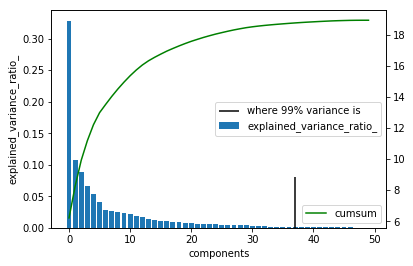

In [77]:
cumsum = np.cumsum(pca.explained_variance_)
fig, ax1 = plt.subplots()
ax1.bar(range(0,50),pca.explained_variance_ratio_,label = 'explained_variance_ratio_')
ax1.set_xlabel('components')
ax1.set_ylabel('explained_variance_ratio_')

ax2 = ax1.twinx()
ax2.plot(range(0,50),cumsum,label='cumsum',color='g')
position = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.99)[0][0]
ax1.vlines(position,0,0.08,label='where 99% variance is')
ax1.legend(loc = 'right')
ax2.legend(loc = 'lower right')
plt.show()

# redo PCA component is 87

In [78]:
pca = PCA(n_components=37)
train_after_pca_87 = pca.fit_transform(X_scaled_train)
test_after_pca_87 = pca.transform(X_scaled_test)

In [82]:
def stacking_regressor_training(origin_data,data,log_y):
    '''
    description for input:
    {
    origin_data: 最原始数据；
    data： 用于模型训练的数据
    }
    description for output:
    {
    the best parameters:str
    }
    '''
    #Find SaleCondition=='Normal' observations to fit the hyperparameters
    normal_index = origin_data[origin_data['SaleCondition']=='Normal'].index
    data_to_choose_hyperparas_x = data.ix[normal_index]
    data_to_choose_hyperparas_y = log_y.ix[normal_index]
    
    #create the instance for the ensemble model
    xgboost = XGBRegressor(nthread =-1)
    gbr = GradientBoostingRegressor(random_state=1,
                min_samples_split=2,
                max_features='sqrt',
                min_samples_leaf=1,)
    etr = ExtraTreesRegressor(bootstrap=False, criterion='mse', 
          min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0,n_jobs=-1,
         random_state=0, verbose=0, warm_start=False)
    rfr = RandomForestRegressor()
    meta_xgboost = XGBRegressor(nthread =-1)
    regressors = [xgboost, gbr, etr, rfr]
    stregr = StackingRegressor(regressors=regressors, meta_regressor=meta_xgboost)
    
    #fit the hyperparameters
    params = {
        'xgboost__learning_rate' : [x/20.0 for x in range(1,20,4)],
        'xgboost__reg_alph' : [x/20.0 for x in range(1,20,4)],
        'xgboost__reg_lambda': [x/20.0 for x in range(1,20,4)],
        'xgboost__n_estimators': [1000,1200,1500,1800,2000,2200,2400,2600,2800,3000],
        'xgboost__subsample': [x/20.0 for x in range(1,20,4)],
        'xgboost__gamma': [x/20.0 for x in range(1,20,4)],
        'rfr__n_estimators': [range(0,2100,100)],
        'gbr__n_estimators': [range(0,3100,100)],
        'gbr__learning_rate': [x/20.0 for x in range(1,20,4)],
        'gbr__subsample': [x/10.0 for x in range(1,10,2)],
        'gbr__max_depth': [range(3,6)],
        'etr__n_estimators': [range(0,3100,100)],
        'etr__learning_rate': [x/20.0 for x in range(1,20,4)],
        'etr__subsample': [x/10.0 for x in range(1,10,2)],
        'etr__max_depth': [range(3,6)],
        'meta-xgboost__learning_rate' : [x/20.0 for x in range(1,20,4)],
        'meta-xgboost__reg_alph' : [x/20.0 for x in range(1,20,4)],
        'meta-xgboost__reg_lambda': [x/20.0 for x in range(1,20,4)],
        'meta-xgboost__n_estimators': [1000,1200,1500,1800,2000,2200,2400,2600,2800,3000],
        'meta-xgboost__subsample': [x/20.0 for x in range(1,20,4)],
        'meta-xgboost__gamma': [x/20.0 for x in range(1,20,4)]        
        
    }
    grid = GridSearchCV(estimator=stregr, param_grid=params, cv=5,refit=True)
    grid.fit(data_to_choose_hyperparas_x, data_to_choose_hyperparas_y)
    
    return grid.best_params_

# model

# XGBRegressor

In [ ]:
best_params = stacking_regressor_training(train,pd.DataFrame(train_after_pca_87),pd.DataFrame(log_train_target))

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [ ]:
xgboost = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
xgboost.fit(train_after_pca_87,log_train_target)

In [ ]:
def alpha_calculation(price_origin_train, X_post_PCA, imputed_data, listype, model):
    #assign values to X,y:
    data_X = imputed_data.drop('SalePrice',axis = 1)
    data_y = imputed_data['SalePrice']
    log_y = np.log(data_y)
    
    #PCA transformation:
    #redo_data_X = scaler.fit(data_X).transform(data_X)
    #trans_redo_data_X = pca.fit_transform(redo_data_X)
    
    #find index 
    index = list(price_origin_train[price_origin_train['SaleCondition'] == listype].index)
    #print(index)
    
    #find the relevant values corresponding to the index
    trans_redo_data_X_dataframe = pd.DataFrame(X_post_PCA).ix[index]
    
    #print(remastered_train,train_X_after_PCA, train_data)
    
    #prediction
    pred = model.predict(trans_redo_data_X_dataframe.values)
    
    #find the alpha corresponding to the abnormal salescondition
    attribute_alpha = log_y.ix[index].values.T/pred
    
    alpha = attribute_alpha.mean()
    origin_mse = mean_squared_error(log_y.ix[index].values.T,pred.reshape(-1,1))
    modified_mse = mean_squared_error(log_y.ix[index].values.T,alpha*pred.reshape(-1,1))
    ratio = (origin_mse-modified_mse)/origin_mse
    return alpha,origin_mse,modified_mse,ratio,model

In [ ]:

fa_alpha,fa_origin_mse,fa_modified_mse,fa_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'Family',xgboost)

abn_alpha,abn_origin_mse,abn_modified_mse,abn_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'Abnorml',xgboost)

adj_alpha,adj_origin_mse,adj_modified_mse,adj_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'AdjLand',xgboost)

all_alpha,all_origin_mse,all_modified_mse,all_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'Alloca',xgboost)

par_alpha,par_origin_mse,par_modified_mse,par_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'Partial',xgboost)


In [ ]:
print('fa_alpha: %f origin: %f modified: %f improve %f'%(fa_alpha,fa_origin_mse,fa_modified_mse,fa_ratio))

print('abn_alpha: %f origin: %f modified: %f improve %f'%(abn_alpha,abn_origin_mse,abn_modified_mse,abn_ratio))

print('adj_alpha: %f origin: %f modified: %f improve %f'%(adj_alpha,adj_origin_mse,adj_modified_mse,adj_ratio))

print('all_alpha: %f origin: %f modified: %f improve %f'%(all_alpha,all_origin_mse,all_modified_mse,all_ratio))

print('par_alpha: %f origin: %f modified: %f improve %f'%(par_alpha,par_origin_mse,par_modified_mse,par_ratio))

In [ ]:
sale_condition = test.SaleCondition
alpha_dict = {'Normal':1,'Abnorml':abn_alpha,'AdjLand':adj_alpha,'Alloca':all_alpha,'Family':fa_alpha,'Partial':par_alpha}

In [ ]:
pred_without_alpha_xgboost = xgboost.predict(test_after_pca_87)
pred_with_alpha_xgboost = pred_without_alpha_xgboost
for i in range(len(sale_condition)):
    pred_with_alpha_xgboost[i] = alpha_dict[sale_condition[i]]*pred_without_alpha_xgboost[i]
    

In [ ]:
pred_with_alpha_xgboost = pd.DataFrame(data = np.exp(pred_with_alpha_xgboost),columns = ['SalePrice'],index = range(1461,2920))
pred_with_alpha_xgboost.index.name = 'Id'
pred_with_alpha_xgboost.to_csv('./pred_with_alpha_xgboost.csv',index = True)


In [ ]:
# pred_xgboost = xgboost.predict(test_after_pca_87)

In [ ]:
# pred_xgboost = pd.DataFrame(data = np.exp(pred_xgboost),columns = ['SalePrice'],index = range(1461,2920))
# pred_xgboost.index.name = 'Id'
# pred_xgboost.to_csv('./pred_xgboost.csv',index = True)

# RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=400)

In [ ]:
rfr.fit(train_after_pca_87,log_train_target)

In [ ]:
pred_rfr = rfr.predict(test_after_pca_87)
pred_rfr = pd.DataFrame(data = np.exp(pred_rfr),columns = ['SalePrice'],index = range(1461,2920))
pred_rfr.index.name = 'Id'
pred_rfr.to_csv('./pred_rfr.csv',index = True)

# GradientBoostingRegressor

In [ ]:
# gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)

In [ ]:
gbr = GradientBoostingRegressor(
                random_state=1,
                learning_rate=0.015, 
                min_samples_split=2,
                max_features='sqrt',
                n_estimators=3000,
                min_samples_leaf=1,
                subsample=0.2,
                max_depth=3,
            )

In [ ]:
gbr.fit(train_after_pca_87,log_train_target)

In [ ]:
pred_gbr = gbr.predict(test_after_pca_87)
pred_gbr = pd.DataFrame(data = np.exp(pred_gbr),columns = ['SalePrice'],index = range(1461,2920))
pred_gbr.index.name = 'Id'
pred_gbr.to_csv('./pred_gbr.csv',index = True)

# ExtraTreesRegressor

In [ ]:
etr = ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features=0.3, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

etr.fit(train_after_pca_87,log_train_target)
pred_etr = etr.predict(test_after_pca_87)
pred_etr = pd.DataFrame(data = np.exp(pred_etr),columns = ['SalePrice'],index = range(1461,2920))
pred_etr.index.name = 'Id'
pred_etr.to_csv('./pred_etr.csv',index = True)

In [ ]:
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
svr.fit(train_after_pca_87,log_train_target)
lasso = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
lasso.fit(train_after_pca_87,log_train_target)
kernelridge = KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)
kernelridge.fit(train_after_pca_87,log_train_target)

# stacking

In [ ]:
from mlxtend.regressor import StackingRegressor

In [ ]:
stregr = StackingRegressor(regressors=[xgboost,rfr,gbr,etr],meta_regressor = xgboost)
stregr.fit(train_after_pca_87,log_train_target)

In [ ]:
def alpha_calculation(price_origin_train, X_post_PCA, imputed_data, listype, model):
    #assign values to X,y:
    data_X = imputed_data.drop('SalePrice',axis = 1)
    data_y = imputed_data['SalePrice']
    log_y = np.log(data_y)
    
    #PCA transformation:
    #redo_data_X = scaler.fit(data_X).transform(data_X)
    #trans_redo_data_X = pca.fit_transform(redo_data_X)
    
    #find index 
    index = list(price_origin_train[price_origin_train['SaleCondition'] == listype].index)
    #print(index)
    
    #find the relevant values corresponding to the index
    trans_redo_data_X_dataframe = pd.DataFrame(X_post_PCA).ix[index]
    
    #print(remastered_train,train_X_after_PCA, train_data)
    
    #prediction
    pred = model.predict(trans_redo_data_X_dataframe.values)
    
    #find the alpha corresponding to the abnormal salescondition
    attribute_alpha = log_y.ix[index].values.T/pred
    
    alpha = attribute_alpha.mean()
    origin_mse = mean_squared_error(log_y.ix[index].values.T,pred.reshape(-1,1))
    modified_mse = mean_squared_error(log_y.ix[index].values.T,alpha*pred.reshape(-1,1))
    ratio = (origin_mse-modified_mse)/origin_mse
    return alpha,origin_mse,modified_mse,ratio,model

In [ ]:

fa_alpha,fa_origin_mse,fa_modified_mse,fa_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'Family',stregr)

abn_alpha,abn_origin_mse,abn_modified_mse,abn_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'Abnorml',stregr)

adj_alpha,adj_origin_mse,adj_modified_mse,adj_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'AdjLand',stregr)

all_alpha,all_origin_mse,all_modified_mse,all_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'Alloca',stregr)

par_alpha,par_origin_mse,par_modified_mse,par_ratio,model = alpha_calculation(train,train_after_pca_87, fullfill_train,'Partial',stregr)


In [ ]:
pred_without_alpha_stregr = stregr.predict(test_after_pca_87)
pred_with_alpha_stregr = pred_without_alpha_stregr
for i in range(len(sale_condition)):
    pred_with_alpha_stregr[i] = alpha_dict[sale_condition[i]]*pred_without_alpha_stregr[i]

In [ ]:
pred_with_alpha_stregr = pd.DataFrame(data = np.exp(pred_with_alpha_stregr),columns = ['SalePrice'],index = range(1461,2920))
pred_with_alpha_stregr.index.name = 'Id'
pred_with_alpha_stregr.to_csv('./pred_with_alpha_stregr.csv',index = True)